In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [3]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\amazon_reviews.csv')

In [5]:
ds.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [7]:
ds.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


In [9]:
ds.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [11]:
ds.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [15]:
ds.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [17]:
# Handle missing values
ds['reviewerName'].fillna('', inplace=True)
ds['reviewText'].fillna('', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\63375636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['reviewerName'].fillna('', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\63375636.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [19]:
ds.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [21]:
ds['total_vote'].value_counts()

total_vote
0       4360
1        380
2         96
3         25
5         13
4         11
7          7
8          3
6          3
109        1
13         1
65         1
16         1
1694       1
139        1
25         1
10         1
1505       1
236        1
118        1
2020       1
68         1
495        1
48         1
21         1
49         1
Name: count, dtype: int64

In [23]:
ds['overall'].value_counts()

overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64

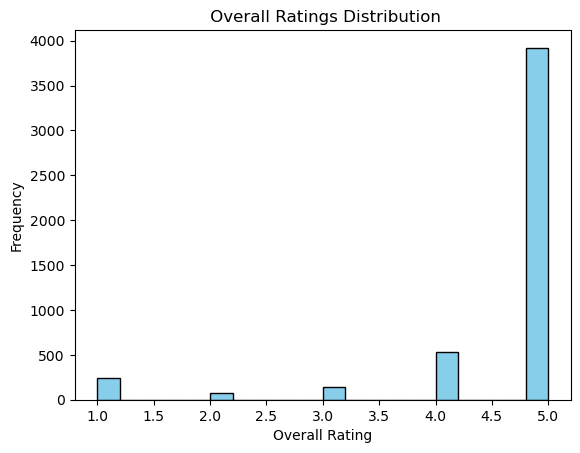

In [25]:
plt.hist(ds['overall'], bins=20, color='skyblue', edgecolor='black')
plt.title(' Overall Ratings Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [27]:
ds['reviewerName'].value_counts()

reviewerName
Amazon Customer    121
David               10
Michael              9
Chris                8
Mike                 7
                  ... 
Gaven fechter        1
G. Becker            1
GB                   1
G-bury               1
Zza                  1
Name: count, Length: 4595, dtype: int64

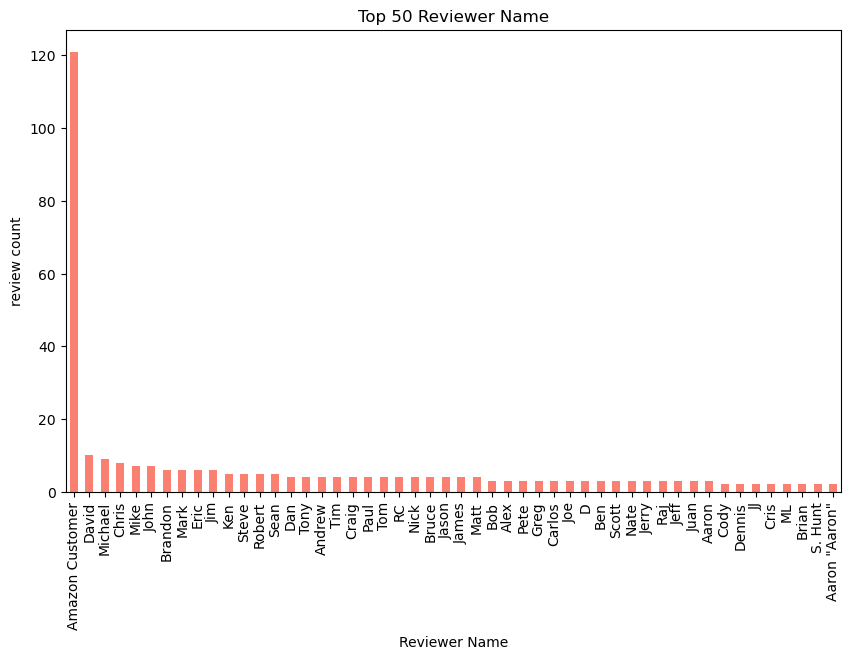

In [40]:
top_auth = ds['reviewerName'].value_counts().head(50)
plt.figure(figsize=(10, 6))
top_auth.plot(kind='bar', color='salmon')
plt.title('Top 50 Reviewer Name')
plt.xlabel('Reviewer Name')
plt.ylabel('review count')
plt.show()

In [42]:
ds.nunique(axis=0)

Unnamed: 0              4915
reviewerName            4595
overall                    5
reviewText              4913
reviewTime               690
day_diff                 690
helpful_yes               23
helpful_no                17
total_vote                26
score_pos_neg_diff        27
score_average_rating      28
wilson_lower_bound        40
dtype: int64

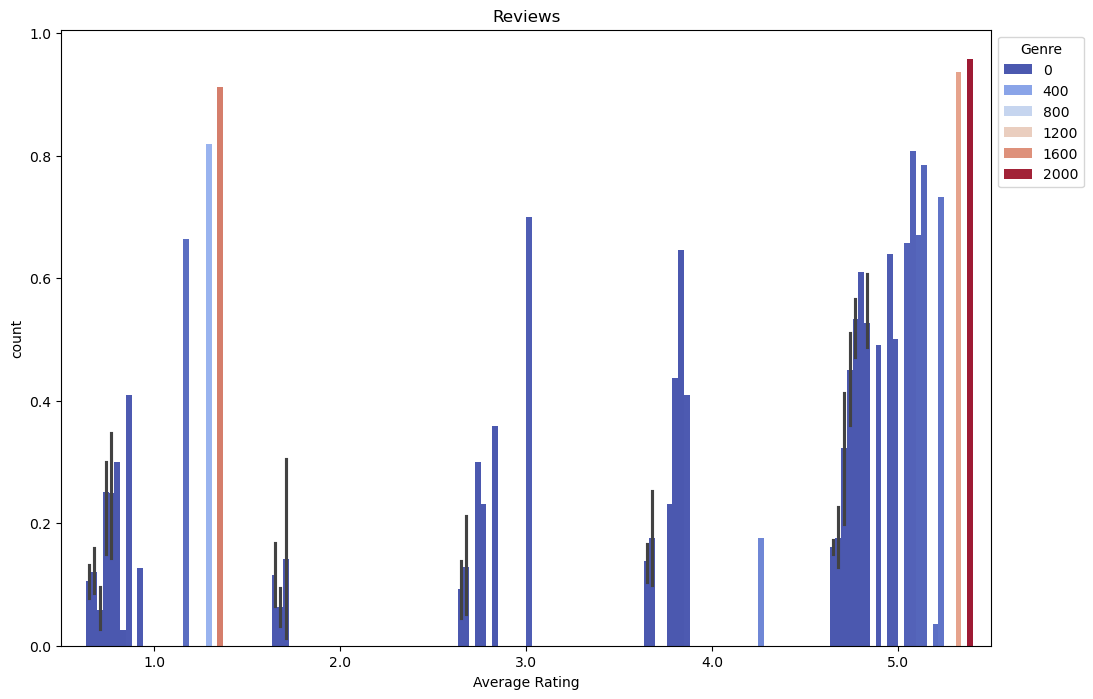

In [50]:
top_reviews = ds.nlargest(10, 'overall')

plt.figure(figsize=(12, 8))
sns.barplot(x='overall', y='wilson_lower_bound', hue='total_vote', data=ds, palette='coolwarm')
plt.title('Reviews')
plt.xlabel('Average Rating')
plt.ylabel('count')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

In [52]:
ds.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [54]:
ds['reviewText']=ds['reviewText'].str.lower()

In [56]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [58]:
def preprocess_text(text):
    if isinstance (text,str):
        tokens=word_tokenize(text)
        filtered_tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalnum()]
        return' '.join(filtered_tokens)
        return np.nan

ds['reviewText']=ds['reviewText'].apply(preprocess_text)

In [64]:
ds['reviewTime'] = pd.to_datetime(ds['reviewTime'], errors='coerce')

In [68]:
ds['reviewText']=ds['reviewText'].str.replace('\d','')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\3508578174.py:1: SyntaxWarning: invalid escape sequence '\d'
  ds['reviewText']=ds['reviewText'].str.replace('\d','')


In [70]:
ds['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected sprung higher capacity think mad...
3       think worked diff bran 64gb card went south 3 ...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire 3...
4911    used extending capability samsung galaxy note ...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    heard bad thing 64gb micro sd card crapping we...
Name: reviewText, Length: 4915, dtype: object

In [72]:
from collections import Counter
words = Counter()
for msg in ds['reviewText']:  
    words.update(msg.split())

print(words.most_common(50))

[('card', 5552), ('work', 2057), ('phone', 1917), ('great', 1461), ('memory', 1378), ('sandisk', 1318), ('sd', 1207), ('one', 1127), ('use', 1117), ('galaxy', 1022), ('speed', 931), ('fast', 908), ('price', 893), ('good', 892), ('problem', 848), ('samsung', 840), ('bought', 836), ('would', 762), ('storage', 759), ('tablet', 735), ('video', 721), ('product', 698), ('well', 675), ('camera', 641), ('issue', 612), ('music', 605), ('class', 600), ('using', 593), ('device', 589), ('get', 589), ('got', 568), ('gb', 549), ('file', 544), ('adapter', 536), ('like', 530), ('micro', 528), ('time', 517), ('note', 507), ('need', 487), ('space', 463), ('worked', 460), ('10', 460), ('buy', 460), ('used', 451), ('say', 444), ('read', 441), ('new', 423), ('picture', 418), ('2', 410), ('much', 403)]


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000) 
X_tfidf = tfidf.fit_transform(ds['reviewText']) 

print(X_tfidf.shape)

(4915, 5000)


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,ds['overall'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(3932, 5000) (983, 5000)


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)
y_pred= nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.7955239064089522


In [86]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 0.814852492370295


In [92]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("LogisticRegression Accuracy:",accuracy_score(y_test, y_pred))

LogisticRegression Accuracy: 0.8087487283825026
